# 전처리

In [28]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2022-06-17

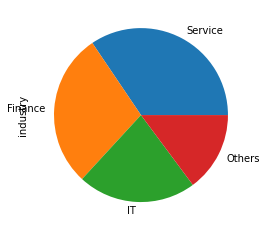

In [29]:
import pandas as pd
data = pd.read_csv("Ex_CEOSalary.csv")

%matplotlib inline

# data.info()

data["industry"] = data["industry"].replace([1, 2, 3, 4], ["Service", "IT", "Finance", "Others"])
data["industry"].value_counts().plot(kind="pie")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


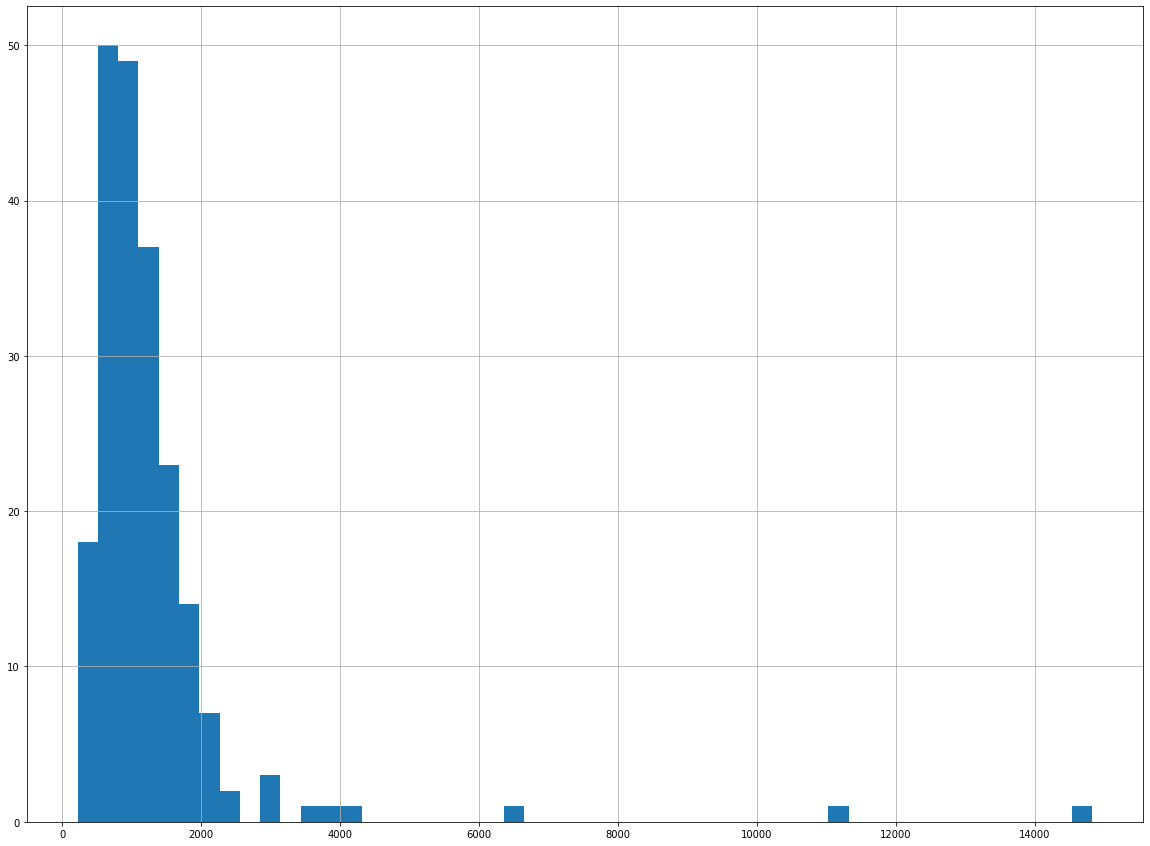

In [30]:
data.describe()
data.skew()
data.kurt()

import matplotlib.pyplot as plt
data["salary"].hist(bins = 50, figsize = (20, 15))

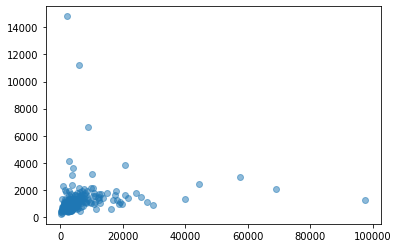

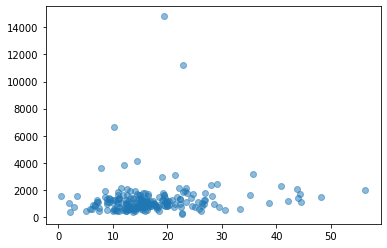

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

In [31]:
import matplotlib.pyplot as plt

plt.scatter(x = data["sales"], y = data["salary"], alpha = 0.5)
plt.show()

plt.scatter(x = data["roe"], y = data["salary"], alpha = 0.5)
plt.show()

# data.describe()
data.groupby("industry")[["salary"]].describe()

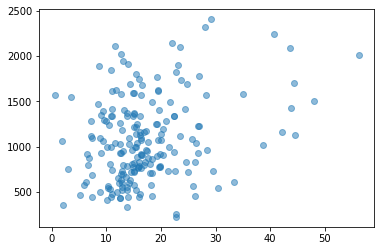

In [41]:
# data.boxplot("roe", return_type = "both")

q1_salary = data["salary"].quantile(q = 0.25)
q3_salary = data["salary"].quantile(q = 0.75)
iqr_salary = q3_salary - q1_salary

data_IQR = data[(data["salary"] < q3_salary + iqr_salary * 1.5) & (data["salary"] > q1_salary - iqr_salary * 1.5)]
# data_IQR.hist(bins = 50, figsize = (20, 15))
data_IQR.corr()

import matplotlib.pyplot as plt
plt.scatter(data_IQR["roe"], data_IQR["salary"], alpha = 0.5)
plt.show()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


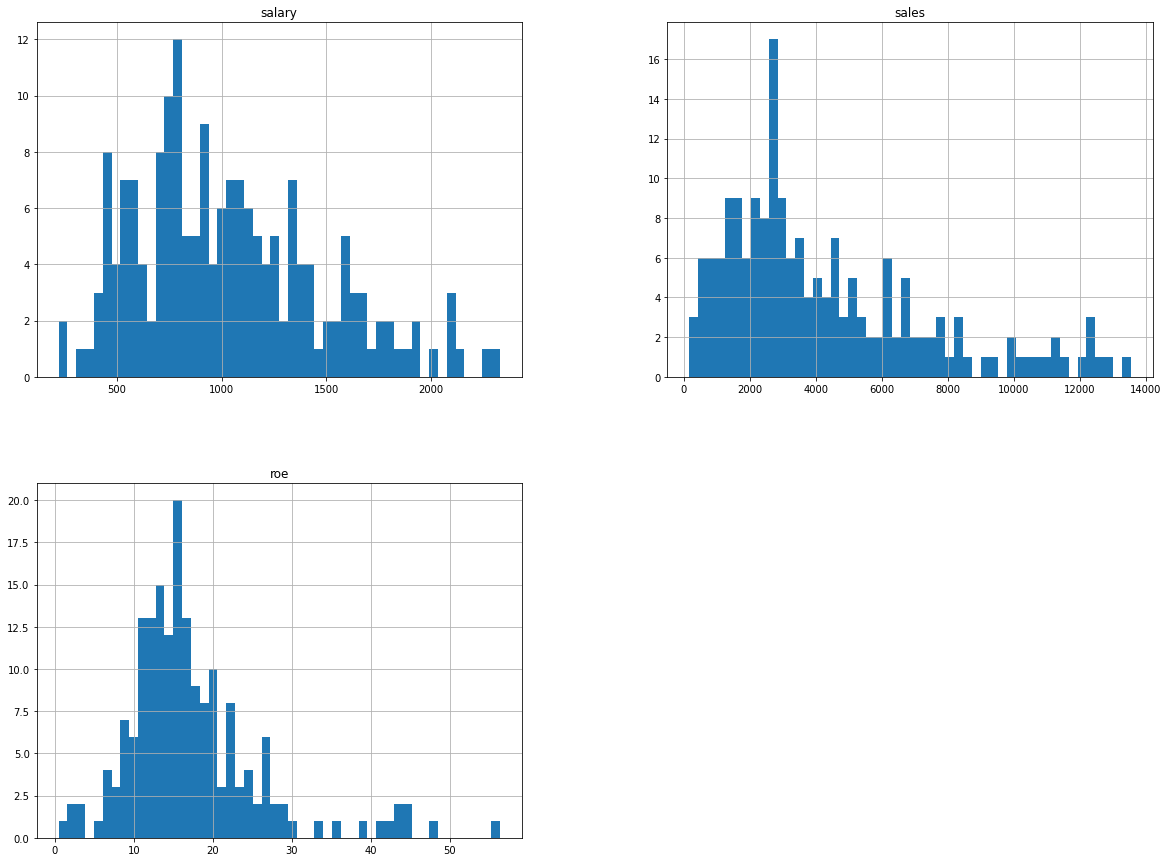

In [45]:
q1_sales = data["sales"].quantile(q = 0.25)
q3_sales = data["sales"].quantile(q = 0.75)
iqr_sales = q3_sales - q1_sales

data_IQR = data[(data["salary"] < q3_salary + iqr_salary * 1.5) & (data["salary"] > q1_salary - iqr_salary * 1.5) & (data["sales"] < q3_sales + iqr_sales * 1.5) & (data["sales"] > q1_sales - iqr_sales * 1.5)]
data_IQR.hist(bins = 50, figsize = (20, 15))
data_IQR.corr()

In [54]:
# 변수 변환. log 변환과 제곱근 변환
import numpy as np

data["log_salary"] = np.log(data["salary"])
data["log_sales"] = np.log(data["sales"])
data["log_roe"] = np.log(data["roe"])

data["sqrt_salary"] = np.sqrt(data["salary"])
data["sqrt_sales"] = np.sqrt(data["sales"])
data["sqrt_roe"] = np.sqrt(data["roe"])

# data.head()
# data.hist(bins = 50, figsize = (20, 15))
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


In [73]:
# 결측치(missing value)의 확인.

import pandas as pd

data = pd.read_csv("Ex_Missing.csv")
# pd.isnull(data)
data["valid"] = data.notnull().sum(1)
data

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


In [84]:
# 결측치의 제거법.

data_del_row = data.dropna(axis = 0)
data_del_row

data_del_col = data.dropna(axis = 1)
data_del_col

data[["salary", "sales", "roe", "industry"]].dropna(axis = 1)

,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


# 2022-06-18

In [120]:
# 결측치의 대체법.

data = pd.read_csv("Ex_Missing.csv")
data_0 = data.fillna(0)
data_0

data_ffill = data.fillna(method = "ffill")
data_ffill

data_bfill = data.fillna(method = "bfill")
data_bfill

data_mean = data.fillna(data.mean())
data_mean

data_other_mean = data.fillna(data["salary"].mean())
data_other_mean


data2 = data.copy()
data2["sales_new"] = np.where(data2["sales"].notnull(), data2["sales"], data2["salary"])
data2

# apply() 메소드와 람다함수를 집어넣어 각 그룹의 평균값으로 결측치를 대체하는 방법.
data_group_mean = data.groupby("industry").apply(lambda x: x.fillna(x.mean()))
data_group_mean

# 산업 1에는 1000, 산업 2에는 2000 처럼 분석자가 원하는 특정값으로 대체하는 방법.
fill_values = {1: 1000, 2: 2000}
data_group_value = data.groupby("industry").apply(lambda x: x.fillna(fill_values[x.name]))
data_group_value

# 한번에 다 바꾸는 방법.
missing_fill_val = {"salary": data["salary"].interpolate(), "sales": data["sales"].mean(), "roe": "missing"}
# missing_fill_val = {"salary": data.salary.interpolate(), "sales": data.sales.mean(), "roe": "missing"}
data_multi = data.fillna(missing_fill_val)
data_multi

,salary,sales,roe,industry
0,1095.000000,27595.000000,14.1,1
1,922.666667,9958.000000,10.9,1
2,750.333333,6125.899902,23.5,1
3,578.000000,16246.000000,5.9,1
4,1368.000000,9069.825012,13.8,1
5,1145.000000,9069.825012,20.0,2
6,1078.000000,2266.699951,16.4,2
7,1094.000000,2966.800049,16.299999,2
8,1237.000000,4570.200195,10.5,2
9,833.000000,2830.000000,missing,2


In [130]:
# 데이터정제 실전과제
# Question : 주택가격 데이터에서 이상치를 찾아 제거하여 정제하라.

import pandas as pd
data = pd.read_csv("house_raw.csv")
# data.head()
# data.describe()
# data.hist(bins = 50, figsize = (20, 15))

# 독립변수는 x에 담고 예측할 종속변수 y는 house_value 이다.
x = data[data.columns[0:5]]
y = data[["house_value"]]

# train_test_split()은 데이터셋 한개에서 간편하게 훈련셋, 시험셋으로 나눠준다.
# 기본적으로 75:25 비율로 나눠준다. 70:30을 원하면 train_size=70이나 test_size=30을 속성으로 주면 된다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

# 독립변수 x들은 각각 범위가 제각각이다. 이를 정규화하기 위해 MinMaxScaler를 쓴다.
# (종속변수 y는 정규화하지 않음에 주의.)
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(x_train)
x_scaled_minmax_train = scaler_minmax.transform(x_train)
x_scaled_minmax_test = scaler_minmax.transform(x_test)

# 선형회귀 사용하는 방법. fit()은 반드시 훈련용 데이터에 적용(당연).
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_scaled_minmax_train, y_train)

# 훈련용 데이터 얼마나 잘맞추는지
pred_train = model.predict(x_scaled_minmax_train)
model.score(x_scaled_minmax_train, y_train)

# 시험용 데이터 얼마나 잘맞추는지
pred_test = model.predict(x_scaled_minmax_test)
model.score(x_scaled_minmax_test, y_test)

# 결과 -2.822 -> 음수가 나온다. 이럴수는 없다. 정확도는 0 ~ 1 사이의 값이어야만 한다.
# 이상치 때문에 그런것이다. 이를 제거하고 다시 분석해보자.

-2.822064801016153

In [142]:
# bedrooms, households, rooms의 이상치를 제거하자.
# data.hist(bins = 50, figsize = (20, 15))
data_bedroom = data[data["bedrooms"] < 0.6]
# data_bedroom["bedrooms"].hist(bins = 100, figsize = (20, 15))

# 0.6 이상인건 세보면 14개 밖에 안된다. 전체 데이터 갯수를 고려하면 없애도 괜찮.
data_bedroom2 = data[data["bedrooms"] >= 0.6]
print(data_bedroom2["bedrooms"].value_counts().sum())

# 마찬가지 방법으로 households와 rooms도 각각 10, 20보다 큰게 거의 없다. -> 똑같은 방식으로 제거가능.
# 분석자가 임의로 정상데이터셋의 기준을 침실 0.5미만, 가족수 7미만, 방12미만으로 지정하였다고 가정. then
new_data = data[(data["bedrooms"] < 0.5) & (data["households"] < 7) & (data["rooms"] < 12)]
# new_data.hist(bins = 50, figsize = (20, 15))


# 자. 이제 이상치를 다 처리하여 적절한 데이터셋을 정제하였으니까 이를 가지고 학습해보자.
# 코드는 아까 위에서 작성한것과 완전히 같다.
x = new_data[new_data.columns[0:5]]
y = new_data[["house_value"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(x_train)
x_scaled_minmax_train = scaler_minmax.transform(x_train)
x_scaled_minmax_test = scaler_minmax.transform(x_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_scaled_minmax_train, y_train)

pred_train = model.predict(x_scaled_minmax_train)
print("훈련데이터 정확도 : ", model.score(x_scaled_minmax_train, y_train))

pred_test = model.predict(x_scaled_minmax_test)
print("테스트데이터 정확도 : ", model.score(x_scaled_minmax_test, y_test))

# 결과 약 0.57 ~ 0.58 정도의 정확도를 보여준다. Very Good!
# 잘 정제된 new_data를 앞으로 두고두고 써먹을거기 때문에 csv 파일로 저장하자.
# new_data.to_csv("housing_price.csv", index = False)

14
훈련데이터 정확도 :  0.5706921210926263
테스트데이터 정확도 :  0.5826083517811866
